In [3]:
!pip install split_folders

In [4]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import splitfolders

In [6]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-04-10 09:27:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.70MB/s    in 3m 53s  

2021-04-10 09:31:08 (1.32 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [7]:
# extract file
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
# split data
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed = 1, ratio = (.6, .4))

Copying files: 2188 files [00:00, 3163.97 files/s]


In [9]:
os.listdir('/tmp/rockpaperscissors/data')

['train', 'val']

In [10]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [11]:
# train data
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scisssors_dir = os.path.join(train_dir, 'scissors')

# valid data
valid_rock_dir = os.path.join(validation_dir, 'rock')
valid_paper_dir = os.path.join(validation_dir, 'paper')
valid_scissors_dir = os.path.join(validation_dir, 'scissors')

In [29]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest' )
 
test_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest' )

In [30]:
train_generator = train_datagen.flow_from_directory (
    train_dir, # the directory
    target_size = (200, 200), # resize image
    batch_size = 32, # number of iteration before internal parameter updated
    color_mode = 'rgb',
    class_mode = 'sparse', # many labels
    shuffle = True,
)
 
validation_generator = test_datagen.flow_from_directory (
    validation_dir, # the directory
    target_size = (200, 200), # resize image
    batch_size = 32, # number of iteration before internal parameter updated
    color_mode = 'rgb',
    class_mode = 'sparse', # many labels
    shuffle = True,
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [32]:
del model

In [33]:
# making the cnn
model = tf.keras.models.Sequential ( [ 
  tf.keras.layers.Conv2D (32, (3,3), activation = 'relu', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D (2, 2),
  tf.keras.layers.Conv2D (64, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D (2, 2),
  tf.keras.layers.Conv2D (128, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D (2, 2),
  tf.keras.layers.Conv2D (128, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D (2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense (512, activation = 'relu'),
  tf.keras.layers.Dense (3, activation = 'softmax')
] )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 128)      

In [35]:
model.compile (
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy'] 
    )

In [36]:
model.fit (
    train_generator,
    steps_per_epoch = 20, # how many batch per steps/epoch
    epochs = 25, # add more if acc still low
    validation_data = validation_generator, # show the validation acc
    validation_steps = 5 # how many epoch too validation
)

Epoch 1/25
20/20 [==============================] - 54s 3s/step - loss: 1.3181 - accuracy: 0.3631 - val_loss: 1.0452 - val_accuracy: 0.3438
Epoch 2/25
20/20 [==============================] - 53s 3s/step - loss: 0.9348 - accuracy: 0.5322 - val_loss: 0.5643 - val_accuracy: 0.8250
Epoch 3/25
20/20 [==============================] - 53s 3s/step - loss: 0.4923 - accuracy: 0.8309 - val_loss: 0.3309 - val_accuracy: 0.8875
Epoch 4/25
20/20 [==============================] - 53s 3s/step - loss: 0.4632 - accuracy: 0.8698 - val_loss: 0.2061 - val_accuracy: 0.9375
Epoch 5/25
20/20 [==============================] - 53s 3s/step - loss: 0.2525 - accuracy: 0.9021 - val_loss: 0.3141 - val_accuracy: 0.8687
Epoch 6/25
20/20 [==============================] - 53s 3s/step - loss: 0.2579 - accuracy: 0.9058 - val_loss: 0.2829 - val_accuracy: 0.8813
Epoch 7/25
20/20 [==============================] - 53s 3s/step - loss: 0.2133 - accuracy: 0.9227 - val_loss: 0.1639 - val_accuracy: 0.9438
Epoch 8/25
20/20 [==

Saving 1i1dlQrE6JnhYXE4.png to 1i1dlQrE6JnhYXE4.png
[[0. 0. 1.]]
SCISSORS


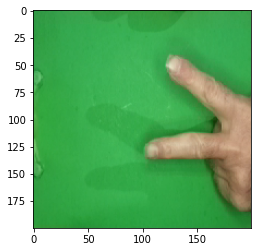

In [43]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(classes)

  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')

In [ ]:
# Steven Adi Santoso
# Graha Padma Semarang
# Kota Semarang, Jawa Tengah 

# Dicoding

# Referensi : https://www.dicoding.com/academies/184/tutorials/8527
#             https://www.tensorflow.org/tutorials/images/classification#dropout
#             https://pypi.org/project/split-folders/